#Red Wine Quality Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, kurtosis, skew, boxcox
import warnings

In [ ]:
!gdown 1qyA0-Fjvixwpf8YG941U9k0zr-qOetLg

Downloading...
From: https://drive.google.com/uc?id=1qyA0-Fjvixwpf8YG941U9k0zr-qOetLg
To: /content/winequality-red.csv
100% 84.2k/84.2k [00:00<00:00, 96.7MB/s]


###Challenge:
.csv file is seperated with ';' so i couldn't read it properly with pandas.
but the with 'sep' argument i could fix this problem. :)

In [ ]:
data = pd.read_csv('winequality-red.csv', sep=';' )
df = data.copy()

#Dataset Overview

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [ ]:
target = df['quality']

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

240

In [ ]:
df = df.drop_duplicates()
df.shape

(1359, 12)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [ ]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df = df.rename(columns={'quality': 'good_quality'})
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
299,6.9,0.67,0.06,2.1,0.08,8.0,33.0,1.00,3.68,0.71,9.6,0
972,10.1,0.38,0.50,2.4,0.10,6.0,13.0,1.00,3.22,0.65,11.6,1
22,7.9,0.43,0.21,1.6,0.11,10.0,37.0,1.00,3.17,0.91,9.5,0
1407,6.0,0.51,0.00,2.1,0.06,40.0,54.0,0.99,3.54,0.93,10.7,0
188,7.9,0.50,0.33,2.0,0.08,15.0,143.0,1.00,3.20,0.55,9.5,0
1436,10.0,0.38,0.38,1.6,0.17,27.0,90.0,1.00,3.15,0.65,8.5,0
487,10.2,0.65,0.36,1.8,0.05,5.0,14.0,1.00,3.17,0.42,10.0,0
963,8.8,0.27,0.39,2.0,0.10,20.0,27.0,1.00,3.15,0.69,11.2,0
1529,7.1,0.69,0.08,2.1,0.06,42.0,52.0,1.00,3.42,0.60,10.2,0
1171,7.1,0.59,0.00,2.2,0.08,26.0,44.0,1.00,3.42,0.68,10.8,0


In [ ]:
df['good_quality'].value_counts()

good_quality
0    1175
1     184
Name: count, dtype: int64

In [ ]:
columns = df.columns

mean_vs_trimmed_mean = pd.DataFrame({'mean':df[columns].mean(),
                                     'trimmed_mean': df[columns].apply(lambda x: trim_mean(x,proportiontocut=0.1))})

kurtosis_skewness = pd.DataFrame({'kurtosis': df[columns].apply(kurtosis),
                                  'skewness': df[columns].apply(skew)})

print('Mean vs Trimmed Mean:')
print(mean_vs_trimmed_mean)

print('\nKurtosis and Skewness:')
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                       mean  trimmed_mean
fixed acidity          8.31          8.15
volatile acidity       0.53          0.52
citric acid            0.27          0.26
residual sugar         2.52          2.26
chlorides              0.09          0.08
free sulfur dioxide   15.89         14.60
total sulfur dioxide  46.83         42.13
density                1.00          1.00
pH                     3.31          3.31
sulphates              0.66          0.64
alcohol               10.43         10.32
good_quality           0.14          0.04

Kurtosis and Skewness:
                      kurtosis  skewness
fixed acidity             1.04      0.94
volatile acidity          1.24      0.73
citric acid              -0.79      0.31
residual sugar           29.25      4.54
chlorides                38.48      5.50
free sulfur dioxide       1.88      1.23
total sulfur dioxide      4.02      1.54
density                   0.82      0.04
pH                        0.87      0.2

#Visualization

###Histogram Plot

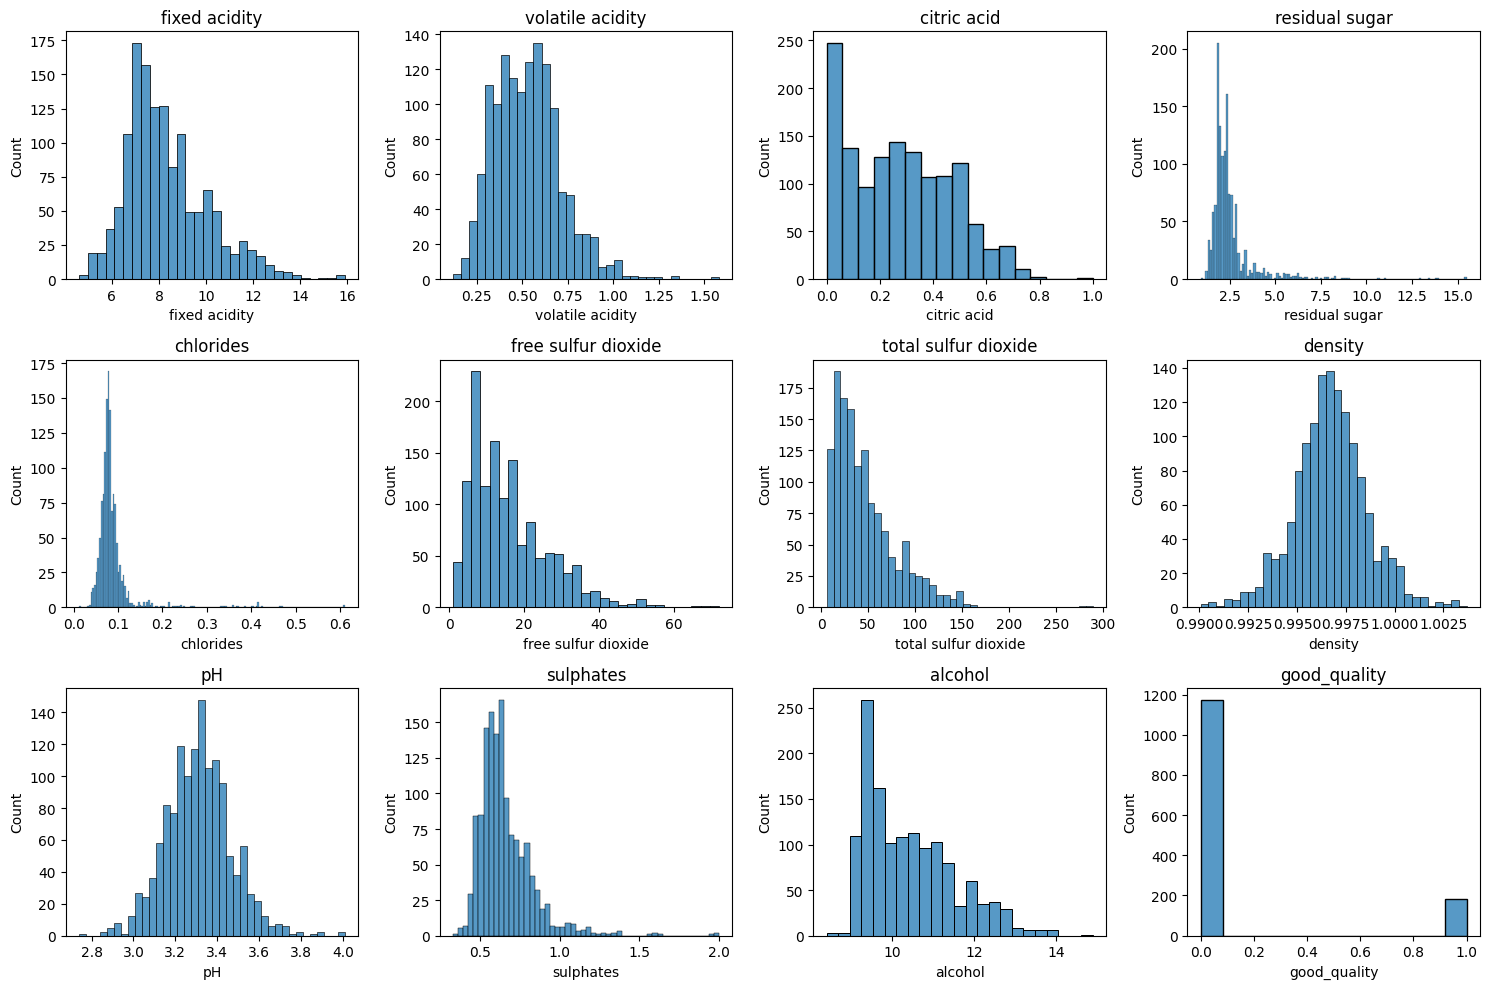

In [ ]:
fig, axs = plt.subplots(3, 4, figsize = (15,10))
index = 0
axs = axs.flatten()

for index, col in enumerate(df.columns):
  sns.histplot(df[col], ax = axs[index])
  axs[index].set_title(col)

plt.tight_layout()
plt.show();

###Distribution plot

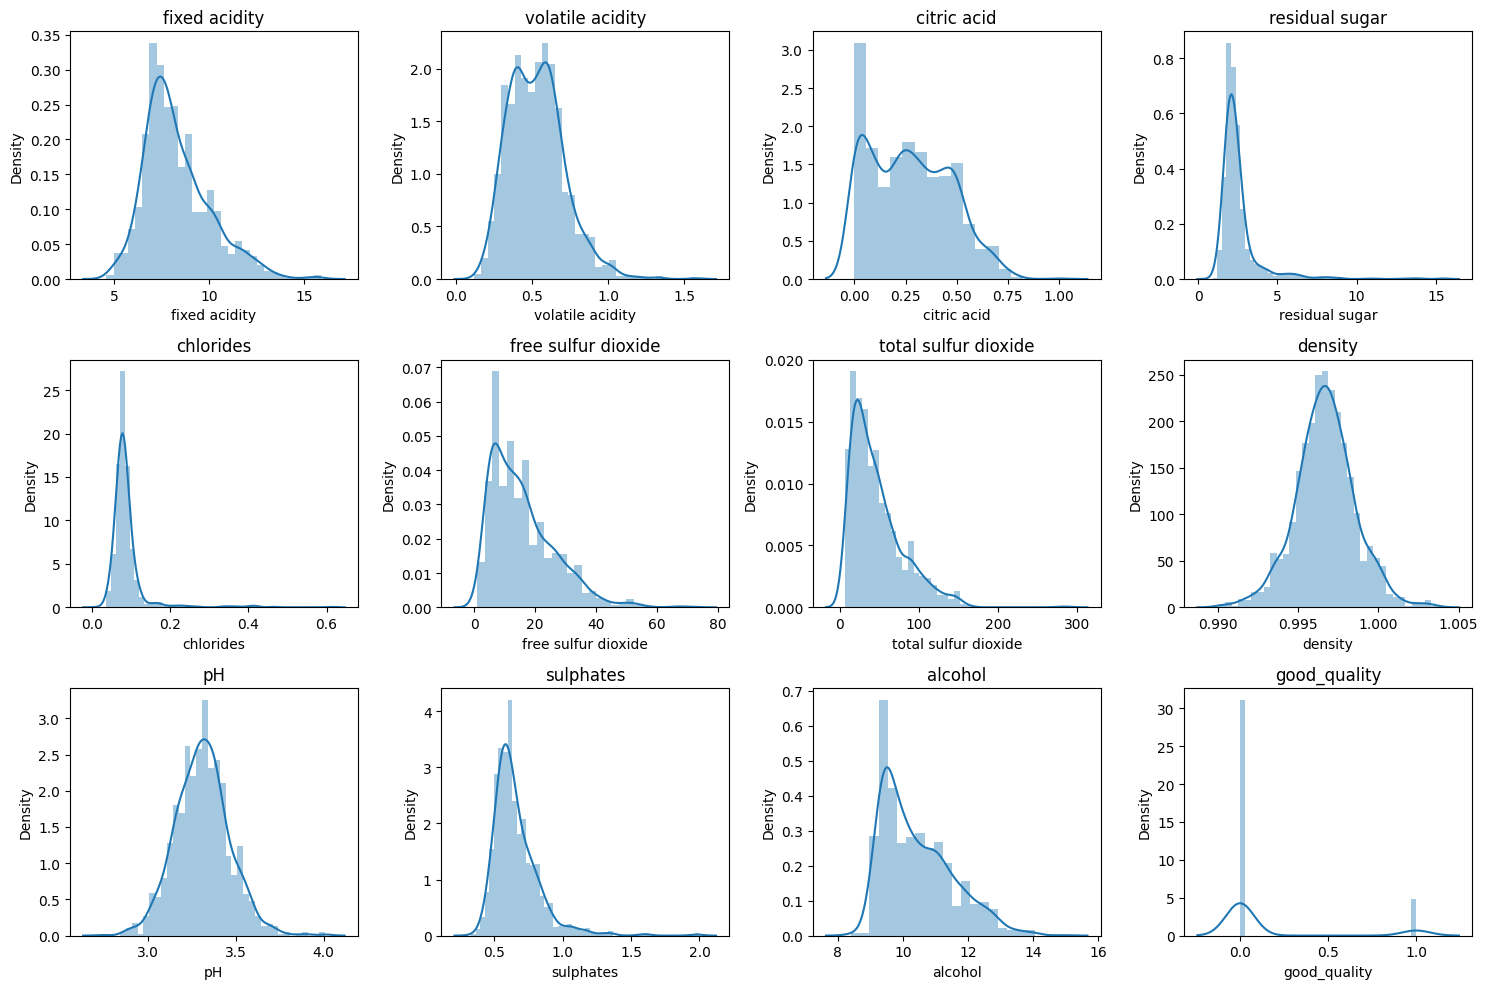

In [ ]:
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(3, 4, figsize = (15,10))
index = 0
axs = axs.flatten()

for index, col in enumerate(df.columns):
  sns.distplot(df[col], ax = axs[index])
  axs[index].set_title(col)

plt.tight_layout()
plt.show();

#Correlation

In [ ]:
corr_matrix = df.corr()
print(corr_matrix['good_quality'].sort_values(ascending=False))

good_quality            1.00
alcohol                 0.41
citric acid             0.20
sulphates               0.20
fixed acidity           0.12
residual sugar          0.05
pH                     -0.05
free sulfur dioxide    -0.07
chlorides              -0.10
total sulfur dioxide   -0.14
density                -0.16
volatile acidity       -0.27
Name: good_quality, dtype: float64


In [ ]:
corr_mat = df.corr().abs()
print(corr_matrix['good_quality'].sort_values(ascending=False))

good_quality            1.00
alcohol                 0.41
citric acid             0.20
sulphates               0.20
fixed acidity           0.12
residual sugar          0.05
pH                     -0.05
free sulfur dioxide    -0.07
chlorides              -0.10
total sulfur dioxide   -0.14
density                -0.16
volatile acidity       -0.27
Name: good_quality, dtype: float64


####6 top correlated columns with target columns are:
1) alcohol                
2) volatile acidity (Negative)
3) sulphates    
4) citric acid     
5) total sulfur dioxide  
6) density (Negative)


<Axes: >

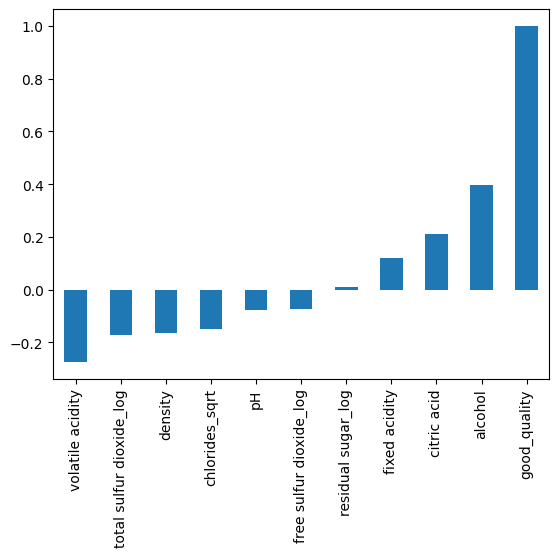

In [ ]:
df.corr()['good_quality'][:-1].sort_values().plot(kind='bar')

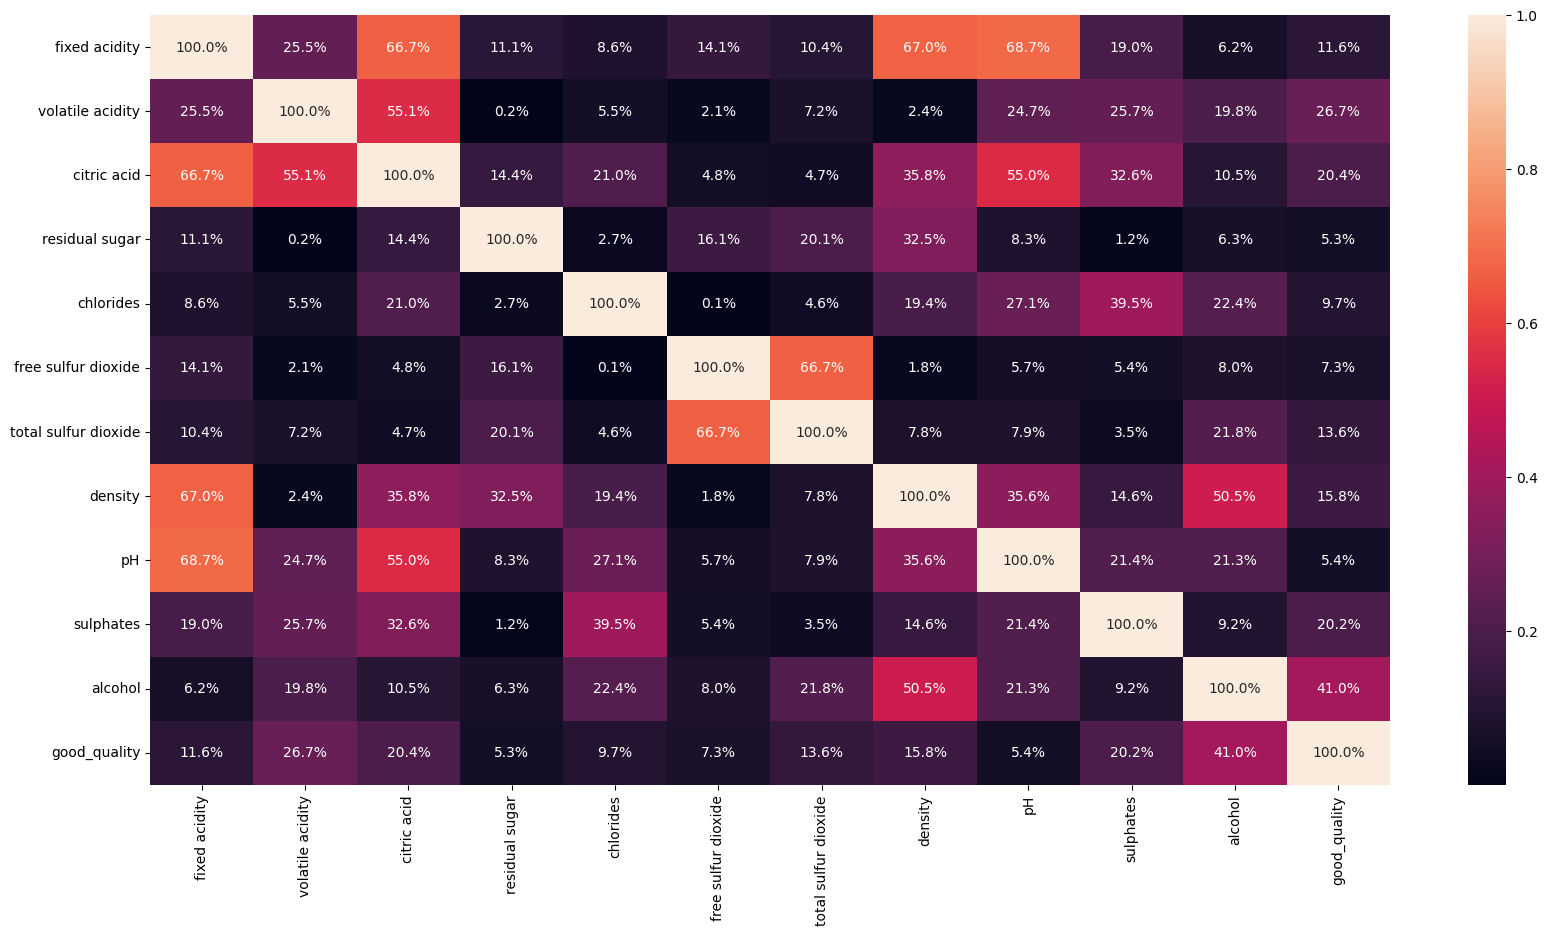

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr().abs(), annot = True, fmt = '.1%');

In [ ]:
#Find the highest correlation

print('The highest correlation between feautures:\n')

for x in range(len(df.columns)):
  corr_matrix.iloc[x,x] = 0.0
corr_matrix.abs().idxmax()


The highest correlation between feautures:



fixed acidity                             pH
volatile acidity                 citric acid
citric acid                    fixed acidity
residual sugar                       density
chlorides                          sulphates
free sulfur dioxide     total sulfur dioxide
total sulfur dioxide     free sulfur dioxide
density                        fixed acidity
pH                             fixed acidity
sulphates                          chlorides
alcohol                              density
good_quality                         alcohol
dtype: object

#Preprocessing, part1:

##Skewness Handling

In [ ]:
skewness = df[columns].apply(skew)
print('Skewness in dataset')
print(skewness)


Skewness in dataset
fixed acidity           0.94
volatile acidity        0.73
citric acid             0.31
residual sugar          4.54
chlorides               5.50
free sulfur dioxide     1.23
total sulfur dioxide    1.54
density                 0.04
pH                      0.23
sulphates               2.40
alcohol                 0.86
good_quality            2.13
dtype: float64


####Highly skewed:
skeness < -1 | skewness > 1
####Moderately Skewed:
-1 <skewness <-0.5 | 0.5 <skewness < 1
####Symmetric
-0.5 < skewness < 0.5


In [ ]:
#thershold = 1
skewed_columns = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

for column in skewed_columns:
  df[f'{column}_sqrt'] = np.sqrt(df[column])
  df[f'{column}_log'] = np.log1p(df[column])

skewness_before = df[skewed_columns].apply(skew)
skewness_after_sqrt = df[[f'{column}_sqrt' for column in skewed_columns]].apply(skew)
skewness_after_log = df[[f'{column}_log' for column in skewed_columns]].apply(skew)

print('Skewness Before Transformation:')
print(skewness_before)
print('\nSkewness after sqrt:')
print(skewness_after_sqrt)
print('\nSkewness after log:')
print(skewness_after_log)

Skewness Before Transformation:
residual sugar          4.54
chlorides               5.50
free sulfur dioxide     1.23
total sulfur dioxide    1.54
sulphates               2.40
dtype: float64

Skewness after sqrt:
residual sugar_sqrt          2.92
chlorides_sqrt               3.66
free sulfur dioxide_sqrt     0.48
total sulfur dioxide_sqrt    0.64
sulphates_sqrt               1.57
dtype: float64

Skewness after log:
residual sugar_log          2.22
chlorides_log               4.92
free sulfur dioxide_log    -0.09
total sulfur dioxide_log   -0.04
sulphates_log               1.63
dtype: float64


Based on skewness results,
in some cases sqrt had better influnce on our data, and in some, log had better results. so we omit the redundant columns and go for the rest of the data.

In [ ]:
df = df.drop(['residual sugar_sqrt', 'chlorides_log', 'free sulfur dioxide_sqrt', 'total sulfur dioxide_sqrt', 'sulphates_log',
         'residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'sulphates' ],axis=1)
df.shape

(1359, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH',
       'alcohol', 'good_quality', 'residual sugar_log', 'chlorides_sqrt',
       'free sulfur dioxide_log', 'total sulfur dioxide_log',
       'sulphates_sqrt'],
      dtype='object')

##BoxPlot

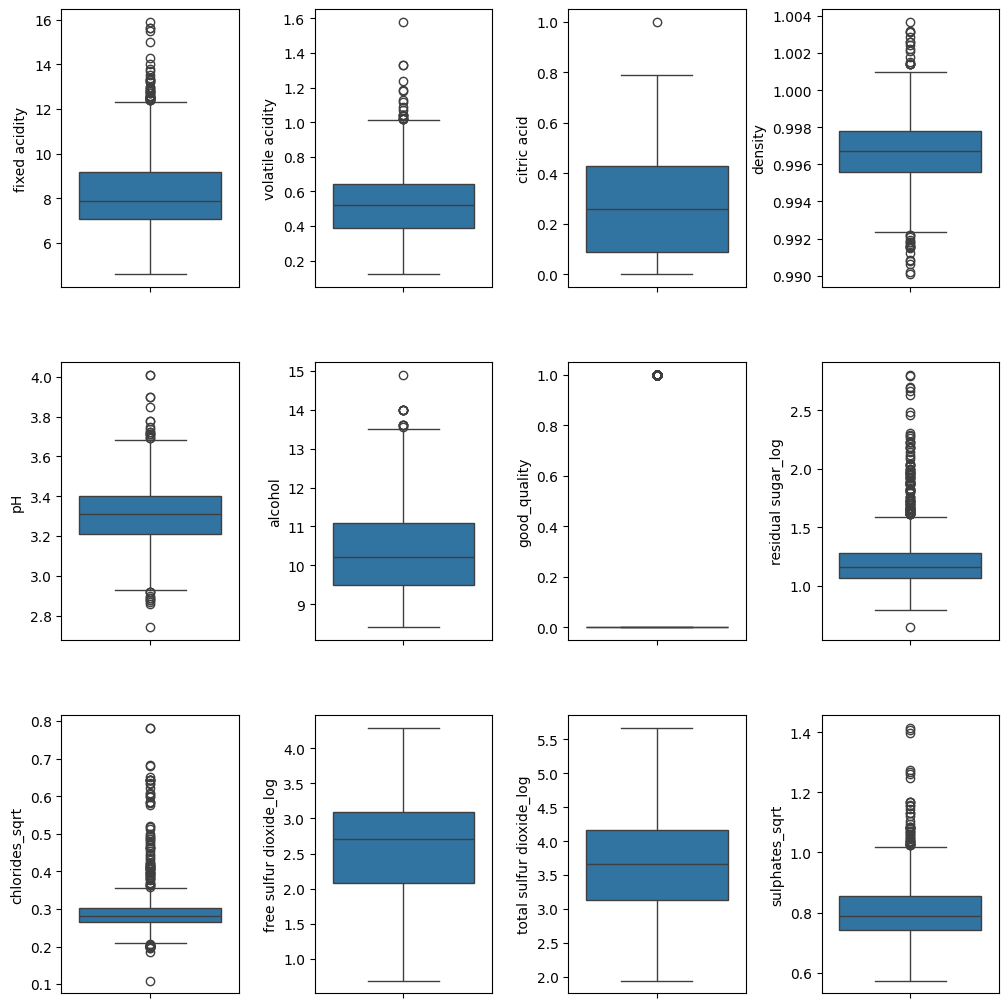

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
index = 0
axs = axs.flatten()
for column in df.columns:
  sns.boxplot(y=column, data=df, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for c, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns fixed acidity outliers = 3.02%
columns volatile acidity outliers = 1.40%
columns citric acid outliers = 0.07%
columns density outliers = 2.58%
columns pH outliers = 2.06%
columns alcohol outliers = 0.96%
columns good_quality outliers = 100.00%
columns residual sugar_log outliers = 7.95%
columns chlorides_sqrt outliers = 6.62%
columns free sulfur dioxide_log outliers = 0.00%
columns total sulfur dioxide_log outliers = 0.00%
columns sulphates_sqrt outliers = 3.38%


####columns with High outlier percentages (>=5%)
1. **Residual Sugar (7.95%)**
2. **Chlorides (6.62%)**

####columns with moderate outlier percentages (2-5 %)
2. **Sulphates (3.38%)**
3. **Fixed Acidity (3.02%)**
4. **Density (2.58%)**
6. **pH (2.06%)**

####Columns with Low Outlier Percentages (< 2%)
1. **Quality (1.99%)**
2. **Volatile Acidity (1.40%)**
3. **Citric Acid (0.07%)**
4. **Alcohol (0.96%)**


##Outlier Hnadling

Since the outliers in residual sugar and chlorides after sqrt and log and
even imputing with median is too high, I decide to drop the values which casued high skewness in our dataset.

In [ ]:
def remove_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['residual sugar_log', 'chlorides_sqrt']:
  df = remove_outliers(df, col)

print(df.shape)

(1157, 12)


In [ ]:
for c, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df_imputed)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns fixed acidity outliers = 3.28%
columns volatile acidity outliers = 1.21%
columns citric acid outliers = 0.00%
columns density outliers = 1.73%
columns pH outliers = 1.64%
columns alcohol outliers = 1.04%
columns good_quality outliers = 100.00%
columns residual sugar_log outliers = 1.38%
columns chlorides_sqrt outliers = 0.78%
columns free sulfur dioxide_log outliers = 0.09%
columns total sulfur dioxide_log outliers = 0.00%
columns sulphates_sqrt outliers = 2.42%


for columns with moderate outliers, I decided to use impute technique
to reduce the amount of outliers.

In [ ]:
def imputed_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  mean = df[column].mean()
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean, df[column])
  return df

columns_to_impute = ['fixed acidity', 'density', 'pH', 'sulphates_sqrt']


for col in columns_to_impute:
  df_imputed = imputed_outliers(df, col)

df_imputed.shape

(1157, 12)

In [ ]:
for c, v in df_imputed.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_column = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_column)[0] * 100.0 / np.shape(df_imputed)[0]
  print('columns %s outliers = %.2f%%' % (c, perc))

columns fixed acidity outliers = 1.38%
columns volatile acidity outliers = 1.21%
columns citric acid outliers = 0.00%
columns density outliers = 0.95%
columns pH outliers = 0.95%
columns alcohol outliers = 1.04%
columns good_quality outliers = 100.00%
columns residual sugar_log outliers = 1.38%
columns chlorides_sqrt outliers = 0.78%
columns free sulfur dioxide_log outliers = 0.09%
columns total sulfur dioxide_log outliers = 0.00%
columns sulphates_sqrt outliers = 0.52%


In [ ]:
df_imputed.sample(5)

,fixed acidity,volatile acidity,citric acid,density,pH,alcohol,good_quality,residual sugar_log,chlorides_sqrt,free sulfur dioxide_log,total sulfur dioxide_log,sulphates_sqrt
97,7.00,0.50,0.25,1.0,3.25,9.2,0,1.10,0.26,1.39,3.14,0.79
792,7.10,0.61,0.02,1.0,3.48,9.7,0,1.25,0.28,2.89,4.48,0.77
381,8.28,0.41,0.68,1.0,3.06,10.0,0,1.36,0.29,2.89,3.78,0.89
862,7.50,0.42,0.32,1.0,3.24,10.4,0,1.31,0.26,2.08,3.26,0.66
227,9.00,0.82,0.14,1.0,3.39,9.8,0,1.28,0.30,2.30,3.18,0.79


#Preprocessing, part2:
##Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_imputed.drop(['good_quality'],axis=1)
y = df_imputed['good_quality'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((867, 11), (290, 11))